# Problem Statement 

Company wants to automate loan eligibility process(real time) based on customer detail provided while filling the application form.These details are Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount,
Loan_Amount_Term,Credit History,Property_Area,To automate this process,they have given a problem to identify cudtomer segments,those are eligible for loan,so that they specifically target those customers. 
                        Since Loan status is Y or N,So it is a classification problem. 



In [1]:
## importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
## loading csv file
loan_df = pd.read_csv("C:/Users/swati/Downloads/DSData-master/DSData-master/loan_prediction.csv")

In [3]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_df.shape

(614, 13)

There are 614 rows and 13 columns.

In [5]:
## Checking columns name:-
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
## Categorical columns list:
Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
## Numerical Column list:
ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can see Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History columns has missing values.

In [8]:
## Again recheck missing values:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

1.There are 13 missing values in Gender column.
2.There are 3 missing values in Married column.
3.There are 15 missing values in Dependents column.
4.There are 32 missing values in Self_Employed column.
5.There are 22 missing values in LoanAmount column.
6.There are 14 missing values in Loan_Amount_Term column.
7.There are 50 missing values in Credit_History column.


In [9]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


From Describe method statistics we can see that missing values and outliers are present in data set.

In [ ]:
## Filling missing values:-

First Let us check, if outliers are present in numerical column then will use median for filling missing values,otherwise mean.

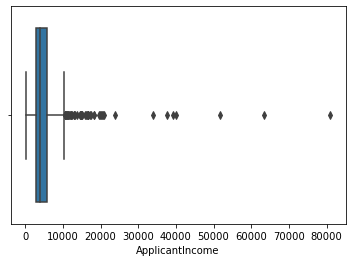

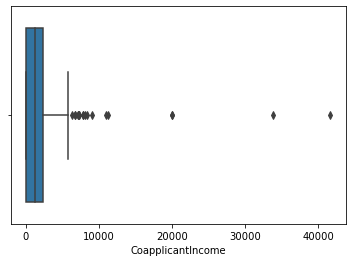

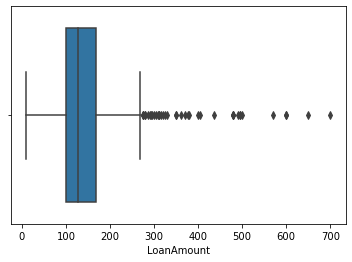

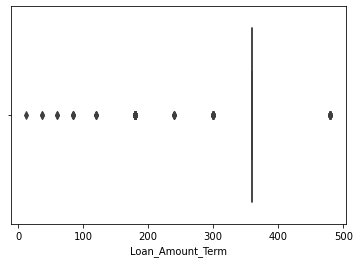

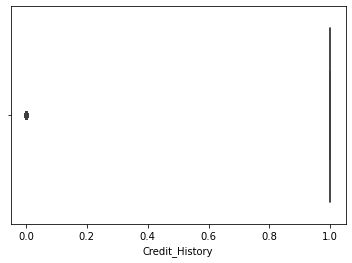

In [10]:
columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for col in columns:
    sns.boxplot(loan_df[col])
    plt.show()

So ,We shall use median for missing values in numerical columns.

In [5]:
loan_df['LoanAmount'] =loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median()) 
loan_df['Loan_Amount_Term'] =loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].median()) 
loan_df['Credit_History'] =loan_df['Credit_History'].fillna(loan_df['Credit_History'].median()) 


In [12]:
## Let us again check missing values in numerical column:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Now not any missing values are present in numerical type columns.

In [6]:
## Let us remove missing values for categorical columns using mode.
loan_df['Gender'] =loan_df['Gender'].fillna(loan_df['Gender'].mode()[0]) 
loan_df['Married'] =loan_df['Married'].fillna(loan_df['Married'].mode()[0]) 
loan_df['Dependents'] =loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0]) 
loan_df['Self_Employed'] =loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0]) 


In [7]:
## Again check for missing values:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now missing values are not present in dataset.

# EDA

# Univariate Analysis

In [ ]:
## Let's check each independent variables ralation with dependent variable:-

<AxesSubplot:xlabel='Gender', ylabel='count'>

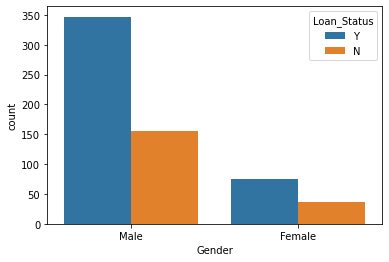

In [31]:
## Visualization :-
sns.countplot(loan_df['Gender'],hue=loan_df['Loan_Status'])

 Count of Loan_status Approved is more for Males than females.

In [35]:
loan_df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

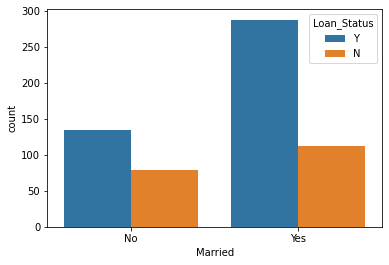

In [32]:
sns.countplot(loan_df['Married'],hue=loan_df['Loan_Status'])

In [ ]:
 Count of Loan_status Approved is more for Married than Singles.

In [37]:
loan_df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

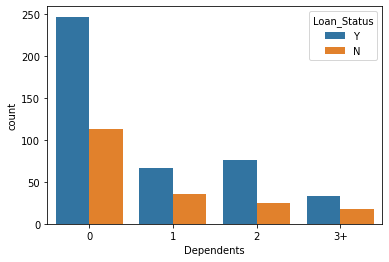

In [33]:
sns.countplot(loan_df['Dependents'],hue=loan_df['Loan_Status'])

Count of Loan_status Approved is most for 0 dependents and less for those with 3+ depandents.

In [39]:
loan_df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Dependents column has 4 type of values,those who are single means 0 dependent,1 dependent,2 dependent,and 3 plus dependant.

<AxesSubplot:xlabel='Education', ylabel='count'>

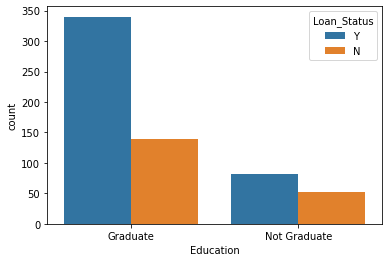

In [34]:
sns.countplot(loan_df['Education'],hue=loan_df['Loan_Status'])

Count of Loan_status Approved  is more for Graduates than Not Graduate.

In [41]:
loan_df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

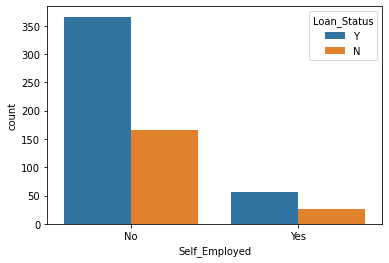

In [35]:
sns.countplot(loan_df['Self_Employed'],hue=loan_df['Loan_Status'])

Count of Loan_status Approved  is more for those who are not self employed.

In [44]:
loan_df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

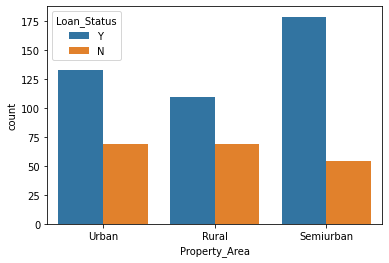

In [36]:
sns.countplot(loan_df['Property_Area'],hue=loan_df['Loan_Status'])

In [ ]:
Count of Loan_status Approved  is most for Semiurban than Urban and Rural.

In [46]:
loan_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

There are 3 types of Property Area ,Semiurban,Urban and Rural.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

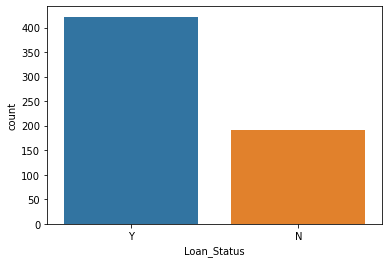

In [47]:
sns.countplot(loan_df['Loan_Status'])

In [49]:
loan_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Count of Loan_status Approved is more than not approved loan status.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

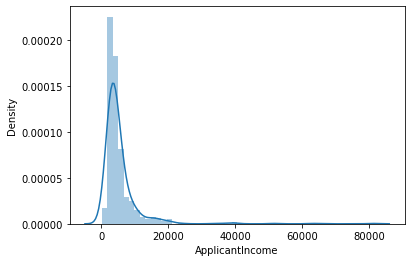

In [50]:
## Checking distribution in numerical columns:-
sns.distplot(loan_df['ApplicantIncome'])

ApplicantIncome column is rightly skewed. 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

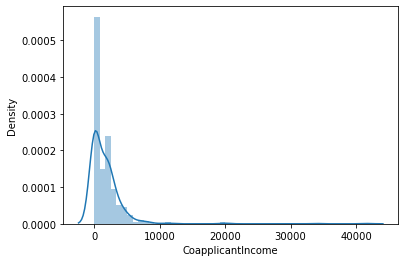

In [51]:
sns.distplot(loan_df['CoapplicantIncome'])

CoapplicantIncome column is rightly skewed.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

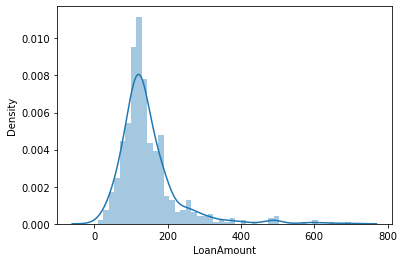

In [52]:
sns.distplot(loan_df['LoanAmount'])

LoanAmount column is rightly skewed.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

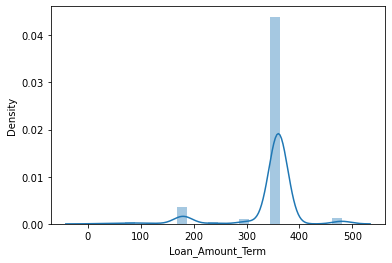

In [53]:
sns.distplot(loan_df['Loan_Amount_Term'])

Loan_Amount_Term column  is left skewed.

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

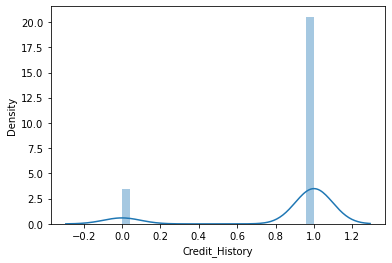

In [54]:
sns.distplot(loan_df['Credit_History'])

Credit_History column is left skewed.

# Bi-Variate Analysis

let's check relation between two variables against target variable:-

<AxesSubplot:title={'center':'Comparison between Married and Dependents'}, xlabel='Married', ylabel='Dependents'>

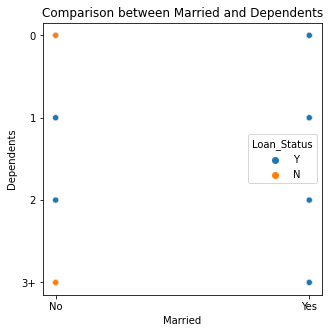

In [39]:
plt.figure(figsize=[5,5])
plt.title('Comparison between Married and Dependents')
sns.scatterplot(loan_df['Married'],loan_df['Dependents'],hue=loan_df["Loan_Status"])


In [ ]:
Those who are married and 3+ dependents or no dependents ,loan status is not approved for them.

<AxesSubplot:title={'center':'Comparison between Dependents and Education'}, xlabel='Dependents', ylabel='Education'>

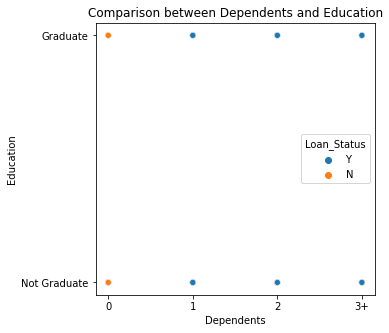

In [40]:
plt.figure(figsize=[5,5])
plt.title('Comparison between Dependents and Education')
sns.scatterplot(loan_df['Dependents'],loan_df['Education'],hue=loan_df["Loan_Status"])


Graduate or Non Graduate,those who have 0 dependents,Loan_Status is not approved.

<AxesSubplot:title={'center':'Comparison between Education and Self_Employed'}, xlabel='Education', ylabel='Self_Employed'>

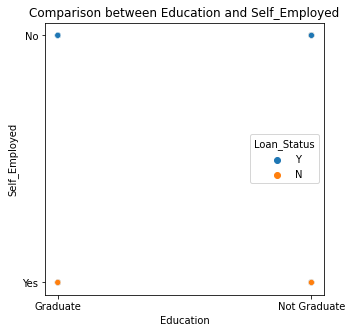

In [42]:
plt.figure(figsize=[5,5])
plt.title('Comparison between Education and Self_Employed')
sns.scatterplot(loan_df['Education'],loan_df['Self_Employed'],hue=loan_df["Loan_Status"])


Graduate or Non Graduate those who are self employed,Loan status is not approved.

<AxesSubplot:title={'center':'Comparison between Self_Employed and ApplicantIncome'}, xlabel='Self_Employed', ylabel='ApplicantIncome'>

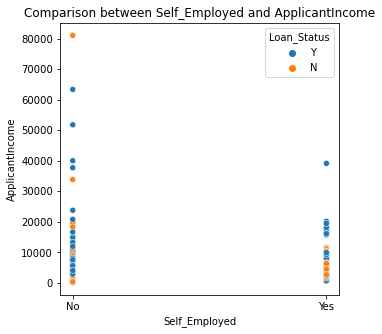

In [44]:
plt.figure(figsize=[5,5])
plt.title('Comparison between Self_Employed and ApplicantIncome')
sns.scatterplot(loan_df['Self_Employed'],loan_df['ApplicantIncome'],hue=loan_df["Loan_Status"])


1.Self_Employed and Income between 15k to 40k ,Loan status is approved.
2.Those who are not self employed and Income ranges between 2k to 65k,Loan status is approved.

<AxesSubplot:title={'center':'Comparison between ApplicantIncome and CoapplicantIncome'}, xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

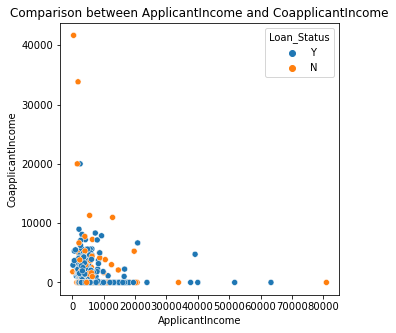

In [46]:
plt.figure(figsize=[5,5])
plt.title('Comparison between ApplicantIncome and CoapplicantIncome')
sns.scatterplot(loan_df['ApplicantIncome'],loan_df['CoapplicantIncome'],hue=loan_df["Loan_Status"])


Applicant income between 2k to 25k around and Co Applicant Income ranges between 2k to 10k,Loan Aprroval status is more.

<AxesSubplot:title={'center':'Comparison between ApplicantIncome and LoanAmount'}, xlabel='ApplicantIncome', ylabel='LoanAmount'>

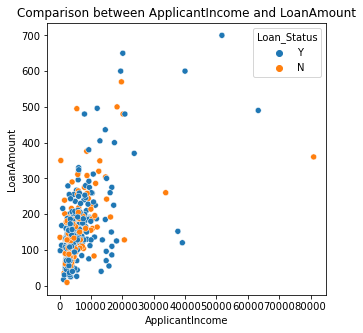

In [47]:
plt.figure(figsize=[5,5])
plt.title('Comparison between ApplicantIncome and LoanAmount')
sns.scatterplot(loan_df['ApplicantIncome'],loan_df['LoanAmount'],hue=loan_df["Loan_Status"])


In [ ]:
Applicant income ranges between 2k to near about 60k ,And loan amount between 10k to 500k, more of Loan status is approved .

<AxesSubplot:title={'center':'Comparison between ApplicantIncome and LoanAmount'}, xlabel='CoapplicantIncome', ylabel='LoanAmount'>

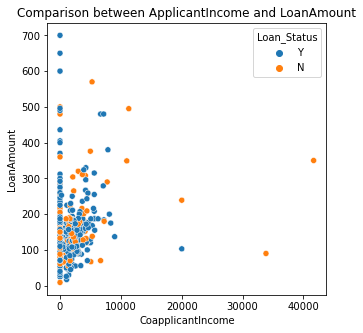

In [48]:
plt.figure(figsize=[5,5])
plt.title('Comparison between ApplicantIncome and LoanAmount')
sns.scatterplot(loan_df['CoapplicantIncome'],loan_df['LoanAmount'],hue=loan_df["Loan_Status"])


In [ ]:
Coapplicant Income ranges between 2k to 10k and Loan Amount between 10k to 350k ,most of Loan status is approved.

<AxesSubplot:title={'center':'Comparison between LoanAmount and Credit_History'}, xlabel='LoanAmount', ylabel='Credit_History'>

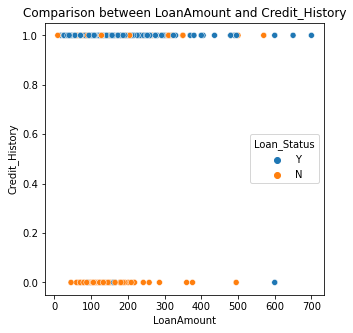

In [50]:
plt.figure(figsize=[5,5])
plt.title('Comparison between LoanAmount and Credit_History')
sns.scatterplot(loan_df['LoanAmount'],loan_df['Credit_History'],hue=loan_df["Loan_Status"])


Loan status is approved more for Credit History 1.

<AxesSubplot:title={'center':'Comparison between LoanAmount and Loan_Amount_Term'}, xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

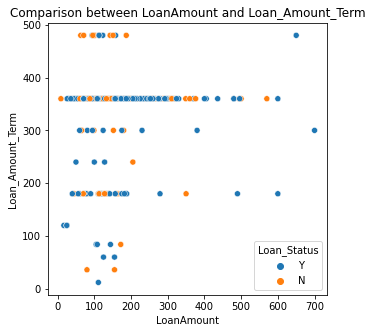

In [51]:
plt.figure(figsize=[5,5])
plt.title('Comparison between LoanAmount and Loan_Amount_Term')
sns.scatterplot(loan_df['LoanAmount'],loan_df['Loan_Amount_Term'],hue=loan_df["Loan_Status"])


Loan status is more approved for Loan Amount Term 360.

<AxesSubplot:title={'center':'Comparison between LoanAmount and Property_Area'}, xlabel='LoanAmount', ylabel='Property_Area'>

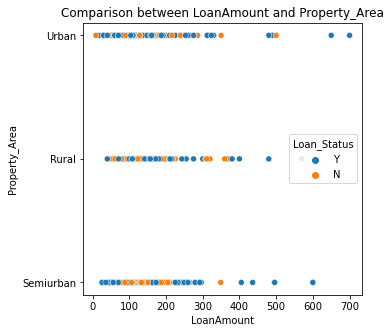

In [52]:
plt.figure(figsize=[5,5])
plt.title('Comparison between LoanAmount and Property_Area')
sns.scatterplot(loan_df['LoanAmount'],loan_df['Property_Area'],hue=loan_df["Loan_Status"])


Loan status approved is more for Urban area.

# MultiVariate Analysis

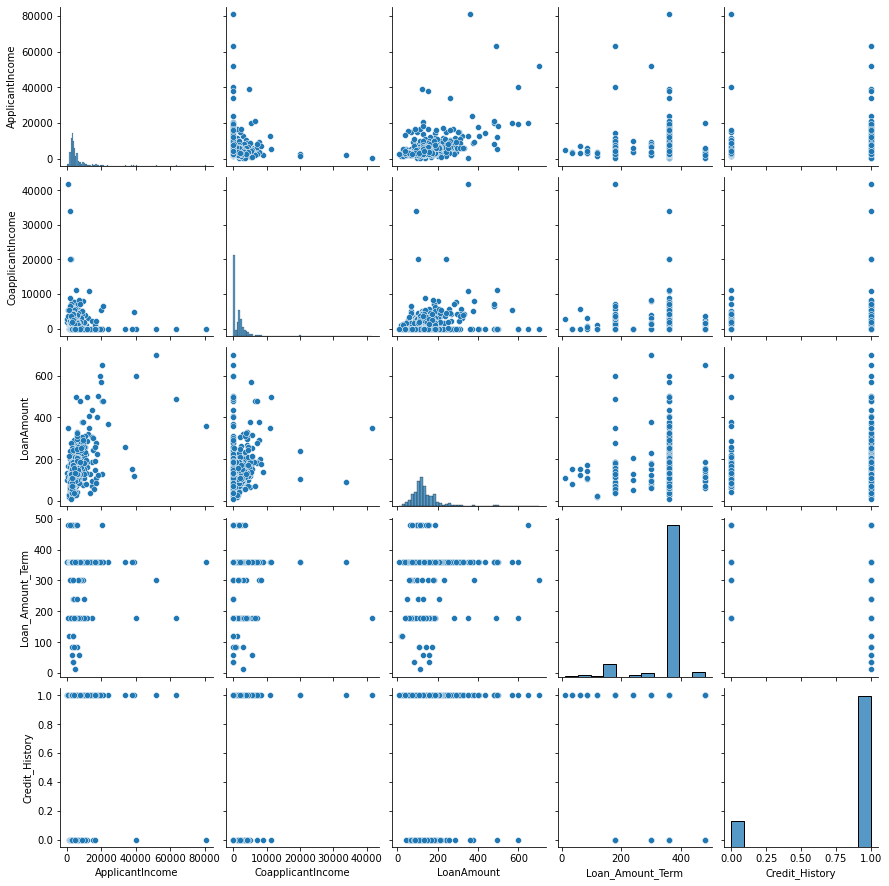

In [53]:
sns.pairplot(loan_df)

# Correlation Matrix:-

In [55]:
corr = loan_df.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


<AxesSubplot:>

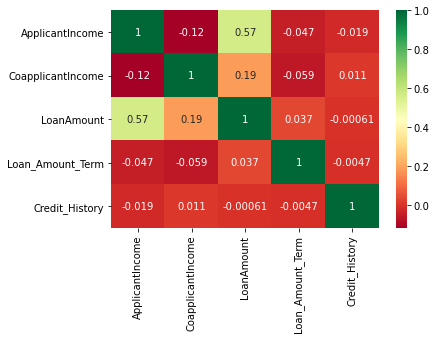

In [56]:
sns.heatmap(corr,annot=True,cmap='RdYlGn')

1.Applicant Income is 57%  positive correlation with Loan Amount.
2.Applicant Income is 12% negative correlation with Co Applicant Income.
3.Loan Amount Term and Credit History has very weak negative correlation.
4.Loan Amount and Loan Amount Term Has very weak correlation of 3.7%.

# Outliers

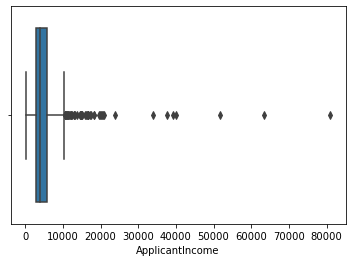

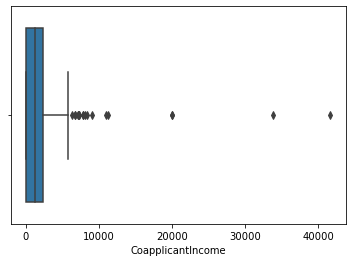

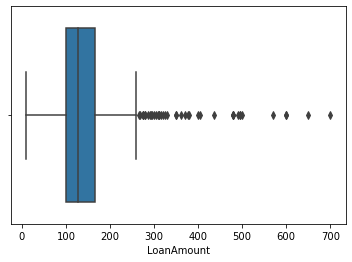

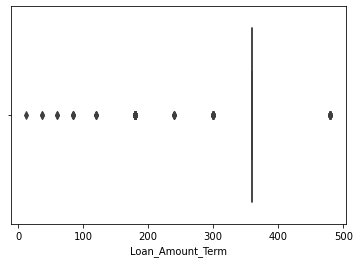

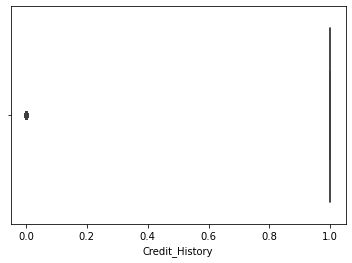

In [8]:
columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for col in columns:
    sns.boxplot(loan_df[col])
    plt.show()

As we have already observed that outliers are present in our dataset.So will remove through Zscore.

# ZScore

In [9]:
from scipy.stats import zscore
columns=loan_df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
z=np.abs(zscore(columns))

new_df = loan_df[(z<3).all(axis=1)]
new_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [60]:
print(loan_df.shape)
print(new_df.shape)


(614, 13)
(577, 13)


In [64]:
data_loss =((614-577)/614)*100
data_loss

6.026058631921824

34 rows are removed as they contain outliers.

# Skewness

In [10]:
new_df.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

all  numerical columns are not in range +/- 5.

In [11]:
from sklearn.preprocessing import PowerTransformer
skewed_features = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]
scaler = PowerTransformer(method='yeo-johnson')


In [12]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.681780,-1.122446,0.000771,0.130788,0.418513
1,0.234783,0.744117,0.000771,0.130788,0.418513
2,-0.527201,-1.122446,-1.437336,0.130788,0.418513
3,-0.791972,0.895786,-0.153545,0.130788,0.418513
4,0.728848,-1.122446,0.238260,0.130788,0.418513


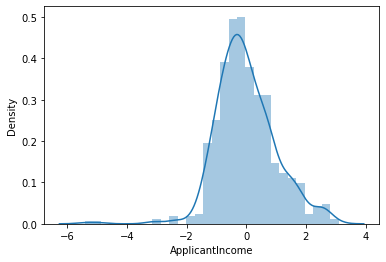

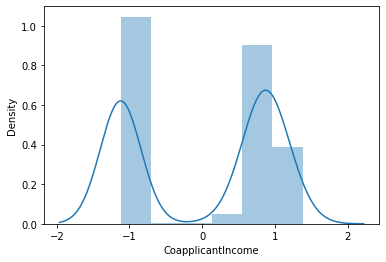

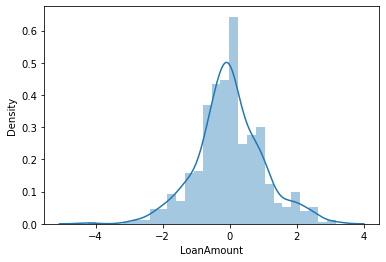

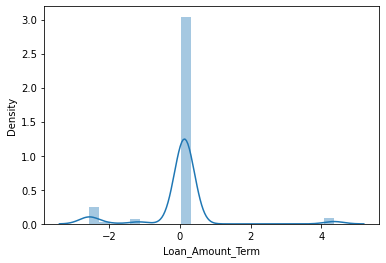

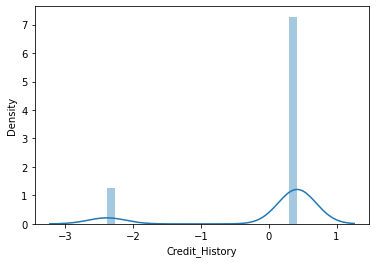

In [70]:
## Let us again check whether data is normally distributed or not:-
column =["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]
for i in column:
    sns.distplot(new_df[i])
    plt.show()

Since we have already removed skewed data and our data set is very small.so now will proceed to next step.

In [ ]:
## Converting Categorical data to numerical data for Model training and Testing:-

# Label Encoder

In [71]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.681780,-1.122446,0.000771,0.130788,0.418513,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.234783,0.744117,0.000771,0.130788,0.418513,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,-0.527201,-1.122446,-1.437336,0.130788,0.418513,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,-0.791972,0.895786,-0.153545,0.130788,0.418513,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.728848,-1.122446,0.238260,0.130788,0.418513,Urban,Y


In [13]:
##Loan_Id is not a necessary colimn to decide loan status,it is just for identification,so will remove this column.
new_df.drop('Loan_ID',axis=1,inplace =True)

In [73]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.681780,-1.122446,0.000771,0.130788,0.418513,Urban,Y
1,Male,Yes,1,Graduate,No,0.234783,0.744117,0.000771,0.130788,0.418513,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.527201,-1.122446,-1.437336,0.130788,0.418513,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.791972,0.895786,-0.153545,0.130788,0.418513,Urban,Y
4,Male,No,0,Graduate,No,0.728848,-1.122446,0.238260,0.130788,0.418513,Urban,Y


In [14]:
columns =['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df[columns]= new_df[columns].apply(le.fit_transform)


In [75]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,0.130788,1,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,0.130788,1,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,0.130788,1,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,0.130788,1,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,0.130788,1,2,1


**Gender Column:-
0-Female
1-Male
** Married Column:-
 Not Married -0
Married-1
** Education Column:-
Graduate-0
Not Graduate-1
**Self_Employed Column:-
Not self employed-0
self employed -1
** Property_Area column:-
Rural-0
SemiUrban-1
Urban-2
** Loan_Status column:-
No-0
Yes-1
    

In [15]:
##Let us split data into features and label:-
x=new_df.drop('Loan_Status',axis=1)
y= new_df['Loan_Status']  

In [16]:
x.shape,y.shape

((577, 11), (577,))

In [17]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

Since the data is not balanced ,so will balance it through oversampling,beacuse we have very small dataset and  in
oversampling technique,no loss of information. 

In [18]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)


In [80]:
y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

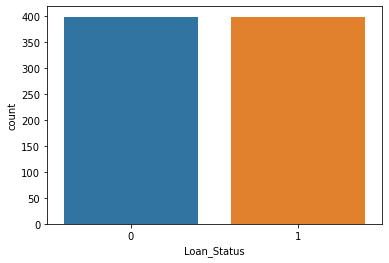

In [19]:
sns.countplot(y)

# Scaling using Standard Scaler:-

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


In [84]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.515268,-1.216450,-0.700503,-0.503531,-0.336581,0.680144,-1.070563,-0.026314,0.098148,0.616076,1.234775
1,0.515268,0.822064,0.330182,-0.503531,-0.336581,0.222023,0.788269,-0.026314,0.098148,0.616076,-1.256685
2,0.515268,0.822064,-0.700503,-0.503531,2.971054,-0.558923,-1.070563,-1.515960,0.098148,0.616076,1.234775
3,0.515268,0.822064,-0.700503,1.985976,-0.336581,-0.830283,0.939311,-0.186161,0.098148,0.616076,1.234775
4,0.515268,-1.216450,-0.700503,-0.503531,-0.336581,0.728383,-1.070563,0.219687,0.098148,0.616076,1.234775


All values are now in +/- 1 range.

# Finding Best Random State:-

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lgr = LogisticRegression()
    lgr.fit(x_train, y_train)
    pred = lgr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)


Best accuracy is  0.8284518828451883  on Random_state  177


# Train Test Split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)


In [87]:
x_train.shape

(557, 11)

In [88]:
x_test.shape

(239, 11)

In [89]:
y_train.shape

(557,)

In [90]:
y_test.shape

(239,)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve


# KNeighborsClassifier

In [24]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
predknc = knc.predict(x_test)

print(accuracy_score(y_test, predknc))
print(confusion_matrix(y_test, predknc))
print(classification_report(y_test,predknc))


0.7573221757322176
[[ 78  30]
 [ 28 103]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       108
           1       0.77      0.79      0.78       131

    accuracy                           0.76       239
   macro avg       0.76      0.75      0.75       239
weighted avg       0.76      0.76      0.76       239



Text(0.5, 1.0, 'Confusion Matrix for Kneighbors Classifier')

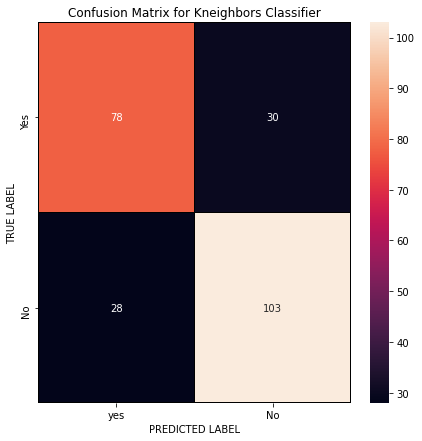

In [25]:
cm = confusion_matrix(y_test,predknc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Kneighbors Classifier')


True Positive-78,True Negative-103,False Positive-30,False Negative-28

# Support Vector Machine Classifier

In [26]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))


0.8075313807531381
[[ 69  39]
 [  7 124]]
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       108
           1       0.76      0.95      0.84       131

    accuracy                           0.81       239
   macro avg       0.83      0.79      0.80       239
weighted avg       0.83      0.81      0.80       239



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine Classifier')

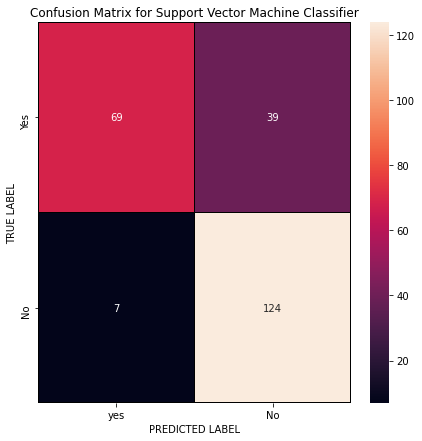

In [27]:
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')


True Positive-69,True Negative-124,False Positive-39,False Negative-7

# DecisionTreeClassifier

In [28]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))


0.7698744769874477
[[88 20]
 [35 96]]
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       108
           1       0.83      0.73      0.78       131

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.78      0.77      0.77       239



Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Classifier')

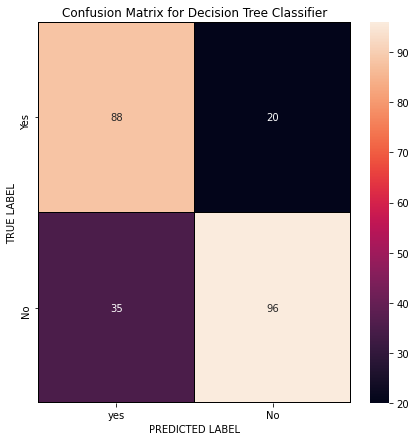

In [29]:
cm = confusion_matrix(y_test,preddtc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')


True Positive-88,True Negative-96,False Positive-20,False Negative-35

# AdaBoostClassifier

In [30]:
adb = AdaBoostClassifier()
adb.fit(x_train,y_train)
predadb = adb.predict(x_test)

print(accuracy_score(y_test, predadb))
print(confusion_matrix(y_test, predadb))
print(classification_report(y_test,predadb))


0.7866108786610879
[[ 75  33]
 [ 18 113]]
              precision    recall  f1-score   support

           0       0.81      0.69      0.75       108
           1       0.77      0.86      0.82       131

    accuracy                           0.79       239
   macro avg       0.79      0.78      0.78       239
weighted avg       0.79      0.79      0.78       239



Text(0.5, 1.0, 'Confusion Matrix for Ada Boost Classifier')

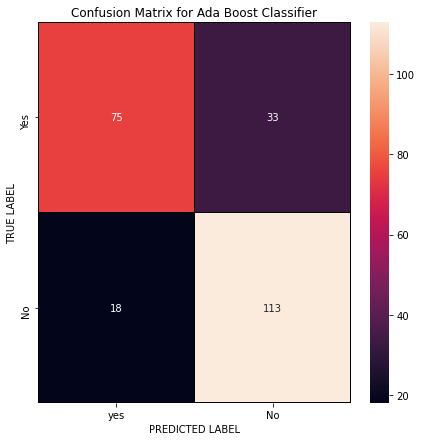

In [31]:
cm = confusion_matrix(y_test,predadb)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Ada Boost Classifier')


True Positive-75,True Negative-113,False Positive-33,False Negative-18

# RandomForestClassifier

In [32]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)

print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))


0.8368200836820083
[[ 87  21]
 [ 18 113]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       108
           1       0.84      0.86      0.85       131

    accuracy                           0.84       239
   macro avg       0.84      0.83      0.83       239
weighted avg       0.84      0.84      0.84       239



Text(0.5, 1.0, 'Confusion Matrix for Random Forest  Classifier')

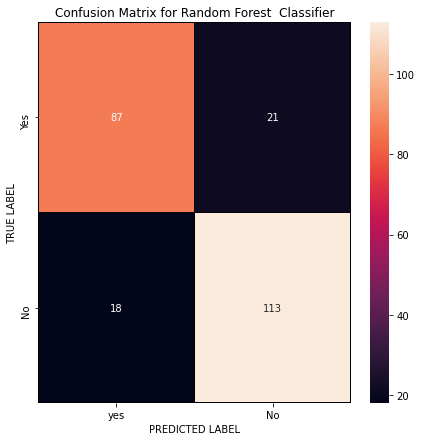

In [33]:
cm = confusion_matrix(y_test,predrfc)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest  Classifier')


True Positive-87,True Negative-113,False Positive-21,False Negative-18

# LogisticRegression

In [34]:
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
predlgr = lgr.predict(x_test)

print(accuracy_score(y_test, predlgr))
print(confusion_matrix(y_test, predlgr))
print(classification_report(y_test,predlgr))


0.8284518828451883
[[ 75  33]
 [  8 123]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.79       108
           1       0.79      0.94      0.86       131

    accuracy                           0.83       239
   macro avg       0.85      0.82      0.82       239
weighted avg       0.84      0.83      0.82       239



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Classifier')

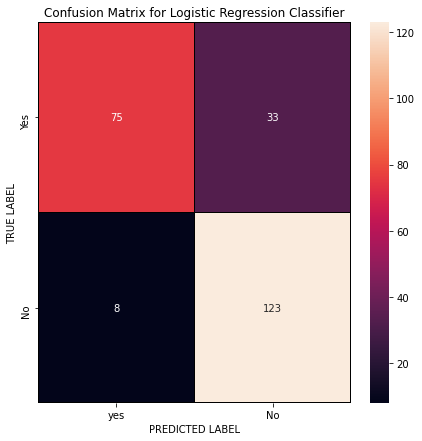

In [35]:
cm = confusion_matrix(y_test,predlgr)

x_axis_labels = ["yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax,  
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')


True Positive-75,True Negative-123,False Positive-33,False Negative-8

# Cross Validation

In [36]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(lgr, x, y, cv=cv)
print("Cross Validation of LogisticRegression model ",cvs.mean())


Cross Validation of LogisticRegression model  0.7707112970711296


In [37]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(knc, x, y, cv=cv)
print("Cross Validation of KNeighbors Classifier model ",cvs.mean())


Cross Validation of KNeighbors Classifier model  0.7548117154811715


In [38]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(dtc, x, y, cv=cv)
print("Cross Validation of DecisionTree Classifier model ",cvs.mean())


Cross Validation of DecisionTree Classifier model  0.7564853556485355


In [39]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(svc, x, y, cv=cv)
print("Cross Validation of Support Vector Machine Classifier model ",cvs.mean())


Cross Validation of Support Vector Machine Classifier model  0.7765690376569038


In [40]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(rfc, x, y, cv=cv)
print("Cross Validation of Random Forest Classifier model ",cvs.mean())


Cross Validation of Random Forest Classifier model  0.8066945606694562


In [41]:
from sklearn.model_selection import ShuffleSplit
n_samples = x.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=maxRS)
cvs = cross_val_score(adb, x, y, cv=cv)
print("Cross Validation of Ada Boost Classifier model ",cvs.mean())


Cross Validation of Ada Boost Classifier model  0.7506276150627615


Cross validation score  is highest for Random Forest,So will do hyper parameter tuning for Random Forest.

# HyperParameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = maxRS,test_size = 0.30)
rfc = RandomForestClassifier()
parameters={'n_estimators' : [100,200],
            'criterion':['gini','entropy'],
            'max_depth':range(2,10),
            'max_features':["auto","sqrt","log2"],
            }


    
gridsearch=GridSearchCV(rfc,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [43]:
## Providing Best parameter to model:-
rfc = RandomForestClassifier(criterion='gini',n_estimators=100,max_features='sqrt',max_depth=8)
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
score = accuracy_score(y_test,predrfc)
print("Accuracy Score :",score*100)
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))


Accuracy Score : 83.68200836820083
[[ 78  30]
 [  9 122]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       108
           1       0.80      0.93      0.86       131

    accuracy                           0.84       239
   macro avg       0.85      0.83      0.83       239
weighted avg       0.85      0.84      0.83       239



# Plotting roc_auc_curve

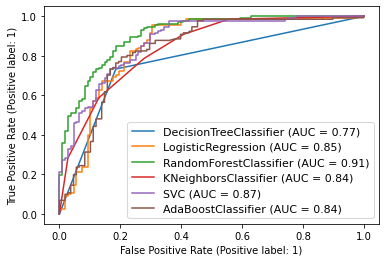

In [44]:
disp =plot_roc_curve(dtc,x_test,y_test)   
plot_roc_curve(lgr,x_test,y_test,ax = disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax = disp.ax_)
plot_roc_curve(adb,x_test,y_test,ax = disp.ax_)

plt.legend(prop={'size': 11},loc = 'lower right')
plt.show()


Area under curve is 91 percent

# Saving the Model:-

In [45]:
import pickle
filename ='loan_status.pickle'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion

In [46]:
a = np.array(y_test)
predicted = np.array(rfc.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new


,Original,Predicted
0,0,0
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
234,1,1
235,0,1
236,1,1
237,0,1
